In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [58]:
for i in range(len(data)):
    if str(data.loc[i,'smoker'])=='yes':
         data.loc[i,'smoker']=1
    elif str(data.loc[i,'smoker'])=='no':
        data.loc[i,'smoker']=0
        

In [59]:
data['smoker']=pd.to_numeric(data['smoker'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [61]:
data=pd.get_dummies(data,drop_first=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   charges           1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


In [63]:
cols=['age',
 'bmi',
 'children',
 ]

In [64]:
def detect_outliers(data):
    for col in cols:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
            
        outliers=[]
        if data.loc[i,col]>upper or data.loc[i,col]<lower:
            outliers.append(data.loc[i,col])
        print('outliers in',col,":",outliers)
detect_outliers(data)

outliers in age : []
outliers in bmi : []
outliers in children : []


In [65]:
for i in range(len(data)):
    if data.loc[i,'age']>90:
        print(i)
    elif data.loc[i,'bmi']>50 or data.loc[i,'bmi']<9:
        print(i)
    elif data.loc[i,'children']>6:
        print(i)



847
1047
1317


In [66]:
ind=[847,1047,1317]
for i in ind:
    print(data.loc[i,'bmi'])

50.38
52.58
53.13


In [67]:
for i in ind:
    data.loc[i,'bmi']=50



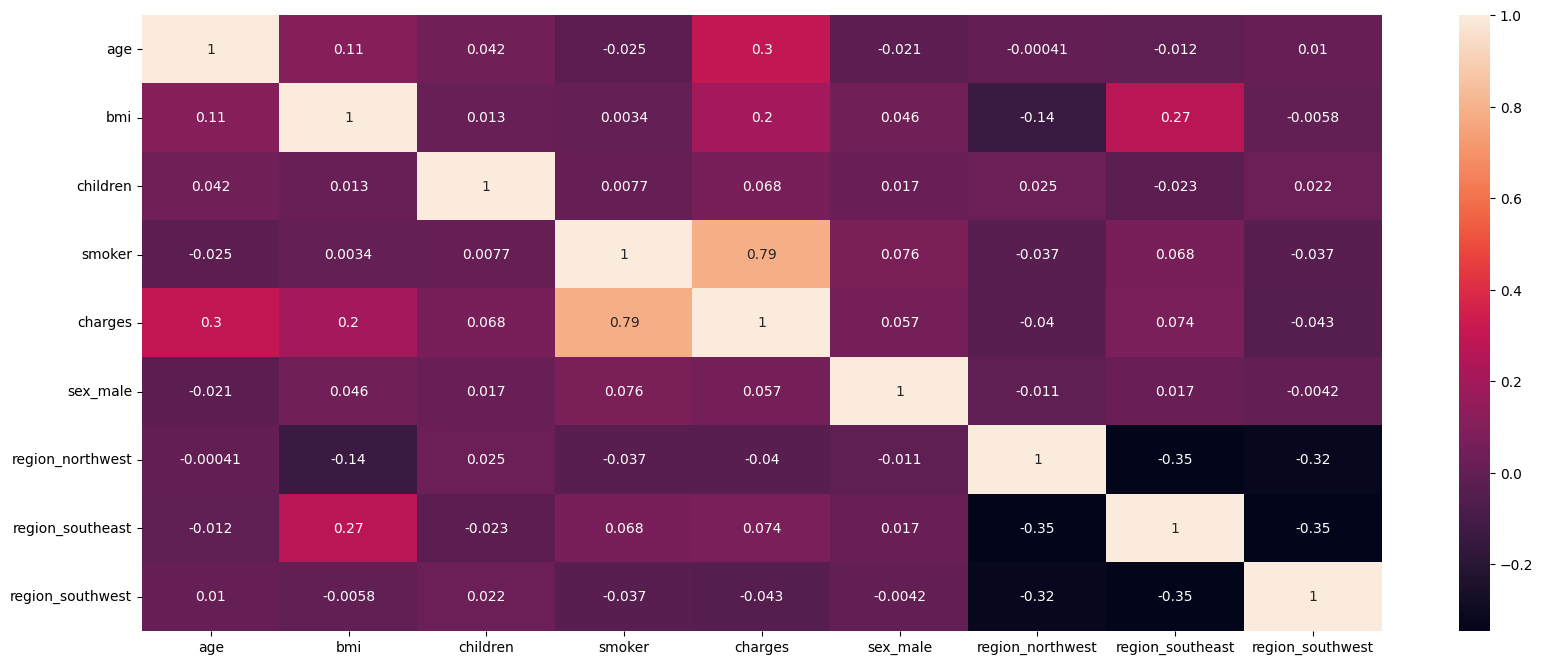

In [68]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [69]:
x=data.drop('charges',axis=1).values
y=data.loc[:,['charges']].values

In [70]:
from sklearn.model_selection import train_test_split
train_x, test_x,train_y,test_y= train_test_split(x,y, test_size=0.1)

In [71]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_x=sd.fit_transform(train_x)
test_x=sd.transform(test_x)

In [72]:
from sklearn.preprocessing import PolynomialFeatures
ply=PolynomialFeatures(degree=4)
train_x_PL =ply.fit_transform(train_x)
test_x_PL=ply.transform(test_x)

In [73]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x_PL, train_y)

LinearRegression()

In [74]:
LinearRegression()

LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error
y_pred_tr=model.predict(train_x_PL)
print("MSE ON TRAIN :",np.sqrt(mean_squared_error(train_y,y_pred_tr)))
print("R2 ON TRAIN :",model.score(train_x_PL,train_y))
y_pred_ts=model.predict(test_x_PL)
print("MSE ON TEST :",np.sqrt(mean_squared_error(test_y,y_pred_ts)))
print("R2 ON TEST :",model.score(test_x_PL,test_y))


MSE ON TRAIN : 4369.84119644009
R2 ON TRAIN : 0.8699485475035352
MSE ON TEST : 5406.46753822469
R2 ON TEST : 0.7968564771867639


In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20,min_samples_split=3,max_depth=6)
model.fit(train_x,train_y)


/tmp/ipykernel_45262/4146504725.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x,train_y)


RandomForestRegressor(max_depth=6, min_samples_split=3, n_estimators=20)

In [77]:
RandomForestRegressor()

RandomForestRegressor()

In [78]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(train_x)
print("MSE ON TRAIN :",np.sqrt(mean_squared_error(train_y,y_pred_tr)))
print("R2 ON TRAIN :",model.score(train_x,train_y))
y_pred_ts=model.predict(test_x)
print("MSE ON TEST :",np.sqrt(mean_squared_error(test_y,y_pred_ts)))
print("R2 ON TEST :",model.score(test_x,test_y))

MSE ON TRAIN : 4369.84119644009
R2 ON TRAIN : 0.9001816775762012
MSE ON TEST : 3723.804807147585
R2 ON TEST : 0.9036282830220386
